In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

['labels.csv', 'train', 'test', 'sample_submission.csv']


In [2]:
from os.path import join
from sklearn.model_selection import train_test_split,StratifiedKFold
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization,MaxPool2D,AvgPool2D, Activation
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
labels = pd.read_csv("../input/labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
#convert breed from categories to numbers
dogs=labels.breed.unique()

breeds={}

num=0
for item in dogs:
    breeds[item]=num
    num+=1
    
labels.breed=[breeds[item] for item in labels.breed]

In [5]:
len(dogs)

120

In [6]:
img_paths = [join("../input/train/", id+".jpg") for id in labels["id"]]

In [7]:
#imgs = [load_img(img_path, target_size=(224, 224)) for img_path in img_paths]

In [9]:
#plt.imshow(imgs[1])

In [10]:
def read_and_prep_images(img_paths, img_height=224, img_width=224):
    imgs = [load_img(img_path, target_size=(img_height, img_width),color_mode="grayscale") for img_path in img_paths]
    img_array = np.array([img_to_array(img)/255 for img in imgs])
    return img_array

In [11]:
train_data = read_and_prep_images(img_paths)

In [12]:
# WHEN USING K-FOLD, DO THIS AFTER TRAIN TEST SPLIT-YOU WILL HAVE TO DO THIS IN THE FOR LOOP
out_y=keras.utils.to_categorical(labels["breed"])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_data, out_y, test_size=0.33, random_state=42)

In [ ]:
X_train[1].shape

In [ ]:
image_tensor=X_train[1].reshape(1,224,224,1)

In [ ]:
#commenting for faster commit
'''model=Sequential()
model.add(Conv2D(1,(3,3),strides=(2,1),input_shape=(224,224,1)))
model.compile('adam','mse')'''

In [ ]:
'''img_pred_tensor=model.predict(image_tensor)'''

In [ ]:
'''img_pred_tensor.shape'''

In [ ]:
'''img_pred=img_pred_tensor[0,:,:,0]'''

In [ ]:
'''plt.imshow(img_pred,cmap='gray')'''

In [ ]:
'''plt.imshow(img_pred,cmap='gray')'''

In [ ]:
'''weights=model.get_weights()'''

In [ ]:
'''weights'''

In [ ]:
'''plt.imshow(weights[0][:,:,0,0],cmap='gray')'''

In [ ]:
'''weights[0]=np.ones(weights[0].shape)'''

In [ ]:
'''model.set_weights(weights)'''

In [ ]:
'''img_pred_tensor=model.predict(image_tensor)
img_pred_tensor.shape'''

In [ ]:
'''img_pred=img_pred_tensor[0,:,:,0]
plt.imshow(img_pred,cmap='gray')'''

In [ ]:
#commenting for faster commit
'''model=Sequential()
model.add(Conv2D(1,(3,3),input_shape=(224,224,1),padding='same'))
model.compile('adam','mse')
img_pred_tensor=model.predict(image_tensor)
img_pred=img_pred_tensor[0,:,:,0]
plt.imshow(img_pred,cmap='gray')'''

In [ ]:
'''model.set_weights(weights)
img_pred_tensor=model.predict(image_tensor)
img_pred_tensor.shape'''

In [ ]:
'''img_pred=img_pred_tensor[0,:,:,0]
plt.imshow(img_pred,cmap='gray')'''

In [ ]:
#commenting for faster commit
'''model=Sequential()
model.add(AvgPool2D((5,5),input_shape=(224,224,1)))
model.compile('adam','mse')'''

In [ ]:
'''img_pred=model.predict(image_tensor)[0,:,:,0]
plt.imshow(img_pred,cmap='gray')'''

In [ ]:
'''img_pred=model.predict(image_tensor)[0,:,:,0]
plt.imshow(img_pred,cmap='gray')'''

In [ ]:
'''img_pred=model.predict(image_tensor)[0,:,:,0]
plt.imshow(img_pred,cmap='gray')'''

In [ ]:
X_train.shape

In [16]:
model=Sequential()
model.add( Conv2D(32,(5,5),input_shape=(224,224,1),activation='relu'))
model.add( Conv2D(32,(5,5),input_shape=(224,224,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add( Conv2D(64,(4,4),input_shape=(224,224,1),activation='relu'))
model.add( Conv2D(64,(4,4),input_shape=(224,224,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add( Conv2D(128,(3,3),input_shape=(224,224,1),activation='relu'))
model.add( Conv2D(128,(3,3),input_shape=(224,224,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add( Conv2D(256,(3,3),input_shape=(224,224,1),activation='relu'))
model.add( Conv2D(256,(3,3),input_shape=(224,224,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(120, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 105, 64)      32832     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 102, 102, 64)      65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 51, 51, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 49, 49, 128)       73856     
__________

In [ ]:
#model.fit(X_train,y_train,batch_size=128,epochs=20,verbose=1) commenting to avoid delays while committing notebook 

In [ ]:
#commenting for faster commit
'''model.evaluate(X_test,y_test)'''

In [ ]:
#Learning Curve

In [14]:
train_sizes=(len(X_train) * np.linspace(0.1,0.999,4)).astype(int)
train_sizes

array([ 684, 2736, 4789, 6841])

In [18]:
initial_weights=model.get_weights()

In [19]:
'''train_scores = []
test_scores = []
for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _= train_test_split(X_train, y_train, train_size=train_size)
    
    # at each iteration, reset the weight of the model
    # to the initial random weights
    model.set_weights(initial_weights)
    h=model.fit(X_train_frac, y_train_frac,
               verbose=0,
               epochs=300,
               callbacks=[EarlyStopping(monitor='loss',patience=1)])
    r= model.evaluate(X_train_frac,y_train_frac,verbose=0)
    train_scores.append(r[-1])
    
    e= model.evaluate(X_test,y_test,verbose=0)
    test_scores.append(e[-1])
    print("Done size:",train_size)'''
    

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Done size: 684
Done size: 2736
Done size: 4789
Done size: 6841


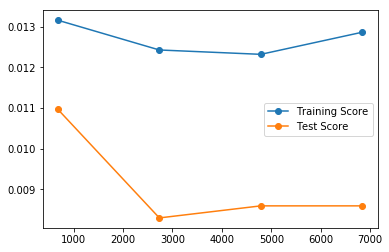

In [20]:
plt.plot(train_sizes,train_scores,'o-',label="Training Score")
plt.plot(train_sizes,test_scores,'o-',label="Test Score")
plt.legend(loc="best")

In [ ]:
#IMPROVING MODEL

In [33]:
'''# [4.783581330921781, 0.008595139300533492]
early stopping stopped at 3rd epoch, now adding batch normalization and dropout layers to the model
and kernel initializer = normal to dense layer'''

'''iteration 2: adding dropout after dense layer and kernel regularizer =l2'''
model=Sequential()
model.add( Conv2D(32,(5,5),input_shape=(224,224,1),activation='relu'))
model.add( Conv2D(32,(5,5),input_shape=(224,224,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add( Conv2D(64,(4,4),input_shape=(224,224,1),activation='relu'))
model.add( Conv2D(64,(4,4),input_shape=(224,224,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add( Conv2D(128,(3,3),input_shape=(224,224,1),activation='relu'))
model.add( Conv2D(128,(3,3),input_shape=(224,224,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add( Conv2D(256,(3,3),input_shape=(224,224,1),activation='relu'))
model.add( Conv2D(256,(3,3),input_shape=(224,224,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(512,activation='relu', kernel_initializer='normal',kernel_regularizer='l2'))
model.add(Dropout(0.4))
model.add(Dense(512,activation='relu', kernel_initializer='normal',kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(120, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [34]:
#model.fit(X_train,y_train,batch_size=128,epochs=10,verbose=1,callbacks=[EarlyStopping(monitor='loss',patience=1)]) #commenting to avoid delays while committing notebook 

Epoch 1/10
6848/6848 [==============================] - 67s 10ms/step - loss: 5.2216 - acc: 0.0134
Epoch 2/10
6848/6848 [==============================] - 66s 10ms/step - loss: 4.6994 - acc: 0.0187
Epoch 3/10
6848/6848 [==============================] - 66s 10ms/step - loss: 4.5648 - acc: 0.0394
Epoch 4/10
6848/6848 [==============================] - 66s 10ms/step - loss: 4.1585 - acc: 0.0895
Epoch 5/10
6848/6848 [==============================] - 66s 10ms/step - loss: 3.3256 - acc: 0.2202
Epoch 6/10
6848/6848 [==============================] - 66s 10ms/step - loss: 1.9071 - acc: 0.5188
Epoch 7/10
6848/6848 [==============================] - 66s 10ms/step - loss: 0.6989 - acc: 0.8087
Epoch 8/10
6848/6848 [==============================] - 66s 10ms/step - loss: 0.3565 - acc: 0.9008
Epoch 9/10
6848/6848 [==============================] - 66s 10ms/step - loss: 0.2628 - acc: 0.9263
Epoch 10/10
6848/6848 [==============================] - 66s 10ms/step - loss: 0.1989 - acc: 0.9492


In [35]:
model.evaluate(X_test,y_test)

3374/3374 [==============================] - 12s 3ms/step


[12.29760820991412, 0.03141671606401897]

In [36]:
initial_weights=model.get_weights()

In [37]:
train_scores = []
test_scores = []
for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _= train_test_split(X_train, y_train, train_size=train_size)
    
    # at each iteration, reset the weight of the model
    # to the initial random weights
    model.set_weights(initial_weights)
    h=model.fit(X_train_frac, y_train_frac,
               verbose=0,
               epochs=300,
               callbacks=[EarlyStopping(monitor='loss',patience=1)])
    r= model.evaluate(X_train_frac,y_train_frac,verbose=0)
    train_scores.append(r[-1])
    
    e= model.evaluate(X_test,y_test,verbose=0)
    test_scores.append(e[-1])
    print("Done size:",train_size)
    

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Done size: 684
Done size: 2736
Done size: 4789
Done size: 6841


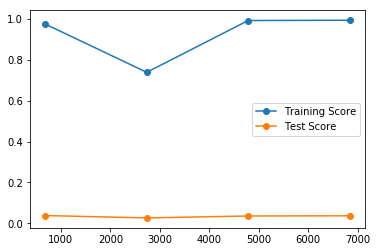

In [38]:
plt.plot(train_sizes,train_scores,'o-',label="Training Score")
plt.plot(train_sizes,test_scores,'o-',label="Test Score")
plt.legend(loc="best")